In [33]:
import pandas as pd
ticket = pd.read_excel('data/ТРАМВАЙ.xlsx')
ticket_1 = ticket.copy()
#print(ticket_1.head())
#'Код предприятия','Название проекта',
ticket_1.drop(['Название предприятия','Код предприятия','Название проекта',
            'Адрес предприятия','Город предприятия','Валюта операции'],axis=1,inplace=True)
print(ticket_1.tail())
ticket_1['Время операции'] = pd.to_datetime(ticket_1['Время операции'])
ticket_1.info()
ticket_1['weeksale'] = ticket_1['Дата операции'].dt.dayofweek
ticket_1['weeksale'].value_counts()
ticket_1['Идентификатор терминала'].value_counts()
#weekend_count = ticket_1[(ticket_1['weeksale'] == 5) | (ticket_1['weeksale'] == 6)]
#weekend_count.shape[0]


     Идентификатор терминала Дата операции Время операции Дата расчета  \
5361                S8513032    2022-06-20       11:43:53   2022-06-21   
5362                S8513032    2022-06-21       18:17:05   2022-06-22   
5363                S8513032    2022-06-22       06:42:17   2022-06-23   
5364                S8513032    2022-06-24       06:06:33   2022-06-27   
5365                     NaN           NaT            NaN          NaT   

           Номер карты  Сумма операции  
5361  535561******8546               7  
5362  414951******7659               7  
5363  444439******0946               7  
5364  414950******7987               7  
5365               NaN           36185  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Идентификатор терминала  5365 non-null   object        
 1   Дата операции  

S8513030    2172
S8513032    1883
S8513031    1310
Name: Идентификатор терминала, dtype: int64

№ м-та
1 и 7 трам        1
1 или 7 трам      1
1 трам            9
1 трамвай         2
1, 7 трам         1
1,7 трам          5
12 трам           3
15 трам           8
17 трам           6
17 трамвай        1
17трам            1
18 трам          12
20 трам           1
21 трам           9
22 трам           6
28 трам          13
28 трам           1
28,5 трам         1
5  трам           1
5 или 28 трам     1
5 трам           29
5 трам            1
5 трамвай         1
5, 28 трам        1
5,28 трам         2
7 или 1 трам      2
7 трам           21
7 трамвай         1
7трамвай          1
8 трам            1
Депо 2            1
Name: Кому передано, dtype: int64


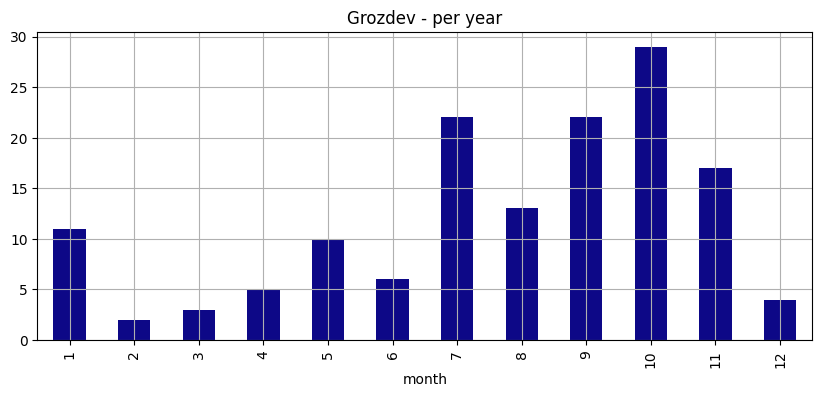

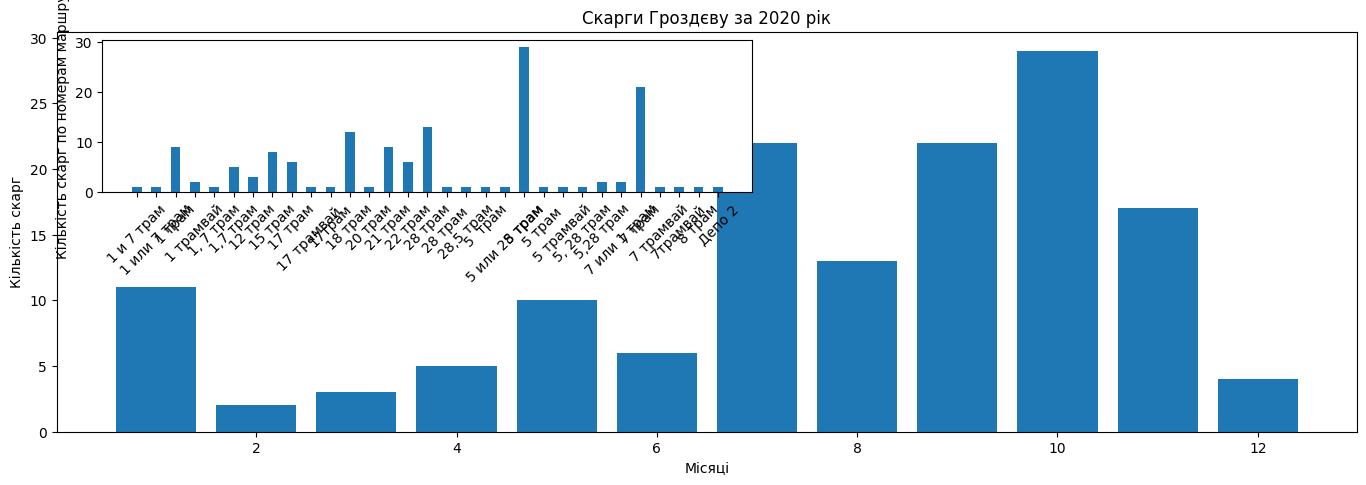

In [1]:
import pandas as pd
report_2019 = pd.read_excel('data/Таблица для инфоцентра 2019-2020 .xlsx')
rep_19 = report_2019.copy()
rep_19['Дата'] = pd.to_datetime(rep_19['Дата'])

"""№	Дата	Время	ФИО абонента	Номер	Комментарии/жалобы	№ м-та	Кому передано	Вопрос/жалоба
Оператор	Стадия	Ответ по жалобе/вопросу	Примечание	weekday """
rep_19['weekday'] = rep_19['Дата'].dt.dayofweek

#pivot!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def rep_dot(arg):
    if type(arg) == str:
        new_arg = arg.replace('.','')
        return new_arg
    else:
        return arg
rep_19['№ м-та'] = rep_19['№ м-та'].apply(rep_dot)
rep_19['month'] = rep_19['Дата'].dt.month
rep_19['№ м-та'].value_counts()[:20]

#mask_5 = rep_19['№ м-та'] == '5 трам'
rep_19_5_month = rep_19[rep_19['№ м-та'] == '5 трам'].groupby('month')['№ м-та'].count()
rep_19_5_weekday = rep_19[rep_19['№ м-та'] == '5 трам'].groupby('weekday')['№ м-та'].count()
rep_19_Komu_week = rep_19[rep_19['Кому передано'] == 'Гроздев О.В.'].groupby('weekday')['Кому передано'].count()
rep_19_Komu_month = rep_19[rep_19['Кому передано'] == 'Гроздев О.В.'].groupby('month')['Кому передано'].count()
#rep_19_group_rep = rep_19.groupby(['№ м-та'])['month'].sum()
rep_19['Кому передано'].value_counts()[:20]
#rep_19.sort_values(by=['weekday','№ м-та'])
#print (rep_19_5_weekday, rep_19_5_month)
#print (rep_19_Komu_week, rep_19_Komu_month)
#rep_19.info()
grouped_Grozdev = (rep_19[rep_19['Кому передано'] == 'Гроздев О.В.']
                   .groupby(['№ м-та'])['Кому передано'].count())
print(grouped_Grozdev)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rep_19_Komu_month.plot(
    kind='bar',
    figsize=(10,4),
    title='Grozdev - per year',
    grid=True,
    colormap='plasma'
);
#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = rep_19_Komu_month.index, height = rep_19_Komu_month);
main_axes.set_ylabel('Кількість скарг')
main_axes.set_title('Скарги Гроздєву за 2020 рік')
main_axes.set_xlabel('Місяці')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.035, 0.6, 0.5, 0.38])
insert_axes.bar(x = grouped_Grozdev.index, height = grouped_Grozdev, width=0.5);
insert_axes.set_ylabel('Кількість скарг по номерам маршрутів')
insert_axes.xaxis.set_tick_params(rotation=45)


TypeError: expected string or bytes-like object

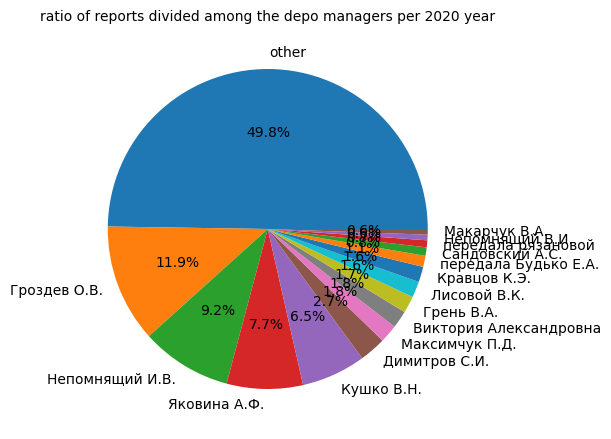

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
report_2019 = pd.read_excel('data/Таблица для инфоцентра 2019-2020 .xlsx')
rep_19 = report_2019.copy()
rep_19['Дата'] = pd.to_datetime(rep_19['Дата'])
"""№	Дата	Время	ФИО абонента	Номер	Комментарии/жалобы	№ м-та	Кому передано	Вопрос/жалоба
Оператор	Стадия	Ответ по жалобе/вопросу	Примечание	weekday """

rep_19['Кому передано'] = rep_19['Кому передано'].apply(lambda x: 'Гроздев О.В.'
                                        if x == 'Гроздеву О.В.' or x == 'передала Гроздеву' else x)
rep_19['Кому передано'] = rep_19['Кому передано'].apply(lambda x: 'Максимчук П.Д.'
                                        if x == 'передала максимчуку' else x)
popular_respond = rep_19['Кому передано'].value_counts().nlargest(15).index
rep_19['Кому передано'] = rep_19['Кому передано'].apply(lambda x: x if x in popular_respond else 'other')
report_count = rep_19['Кому передано'].value_counts()

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((1,1,1,1))
pie = ax.pie(
    report_count,
    labels=report_count.index,
    autopct='%1.1f%%'
)
title = ax.set_title('ratio of reports divided among the depo managers per 2020 year', fontsize=10)

def check_trol(name):
#    name = name.lower()
    a = re.findall(r'\w*трол\w*', name)
    try:
        if a[0] in name:
            return name
    except IndexError:
        return None

rep_19['trol_group'] = rep_19['№ м-та'].apply(check_trol)

In [8]:
import re
import pandas as pd
a = pd.Series([
    '5 трол',
    '2 тролл',
    'тролл',
    'трол',
    'тролейбус',
    'троллейбус',
    'трамвай',
    'машина',
    '7 трамвай',
    'трол№10',
    'аварійна машина'
])
b = 'трол'

def get_trol_word(arg):
    k_word = 'трол'
    root_word = re.findall(r'т\w\w\w', arg)
    if root_word == k_word:
        return arg
    else:
        return False
    
a.apply(get_trol_word)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [18]:
a = '5тролл'
b = 'трол'
a_list = list(a)
b_list = list(b)
for m in a_list:
    for n in b_list:
        c_list = []
        if m == n:
            c_list.append(m)
            
c_list


['л']

In [12]:
import pandas as pd
a = pd.Series([
    '5 трол',
    '2 тролл',
    'тролл',
    'трол',
    'тролейбус',
    'троллейбус',
    'трамвай',
    'машина',
    '7 трамвай',
    'трол№10',
    'аварійна машина'
])
b = 'трол'

import re
name = '5 тролейбус'

def check_bus(name):
    name = name.lower()
    a = re.findall(r'\w*трол\w*', name)
    try:
        if a[0] in name:
            return name
    except IndexError:
        return None

check_bus(name)
 
#           '5 трол, 2 тролл, тролл, трол, тролейбус, троллейбус')
a.apply(check_bus)



0         5 трол
1        2 тролл
2          тролл
3           трол
4      тролейбус
5     троллейбус
6           None
7           None
8           None
9        трол№10
10          None
dtype: object

In [14]:
import re

a = re.findall(r'\w*трол\w*', 'троллейбус')
a
result = re.findall(r'\w*', 'троллейбус')
result


['троллейбус', '']